Data Source1: https://www.connecticut-demographics.com/cities_by_population
The data is from the US Census. Below are 178 Connecticut cities ranked 1 through 176. You can copy and paste this list directly into your favorite spreadsheet program

Data Source2:https://catalog.data.gov/dataset/nursing-facility-registry
Public: This dataset is intended for public access and use.
Non-Federal: This dataset is covered by different Terms of Use than Data.gov.
 License: No license information was provided.

Hypothesis: There are more number of nursing facilities in the city that has more population than the rest that are not so populated 
Question:Distribution of ages, how many patients are less than the age of 35?
Ehat is the percentage of people who pay through the tradional method when compared to the no insurance method? 

#Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
import datetime as dt
import time

#Loading first dataset

In [127]:
df1 = pd.read_excel('23.xlsx', sheetname='23')

In [128]:
df1

,Level of Care,FACILITY NAME,FACILITY TELEPHONE,TOWN,COUNTY,OWNERSHIP TYPE,MEDICARE CERTIFIED,MEDICAID CERTIFIED,Total Licensed Beds,Licensed CCNH Beds,...,Long-Term care insurance -- Not CT Partnership,Private insurance (not long-term care),Private pay (no insurance),Unknown Payment Source,Reporting Year,Location 1,Percentage of private insurance,Percentage of traditional insurance,Number of facilities in each county,Name of the county
0,CCNH,Pope John Paul II Center,(203) 797-9300,Danbury,FAIRFIELD,For Profit,1,1,141,141,...,0,0,5,11,2013,33 Lincoln Avenue CT 06810- (41.38420547600049...,25.200000,9.692308,125.0,Fairfield
1,CCNH,"Aurora Senior Living of Norwalk, LLC",(203) 847-9686,Norwalk,FAIRFIELD,For Profit,1,1,150,150,...,0,3,7,0,2013,"34 Midrocks Road CT 06851- (41.14202464500045,...",21.000000,5.653846,194.0,HartFord
2,CCNH,Wilton Meadows Health Care Center,(203) 834-0199,Wilton,FAIRFIELD,For Profit,1,1,148,148,...,0,7,17,2,2013,"439 Danbury Road, Route 7 CT 06897- (41.216663...",7.647059,5.909091,44.0,Litchfield
3,CCNH,Long Ridge of Stamford,(203) 329-4026,Stamford,FAIRFIELD,For Profit,1,1,120,120,...,0,0,3,3,2013,710 Long Ridge Road CT 06902- (41.093573499000...,34.000000,7.846154,47.0,Middlesex
4,CCNH,Astoria Park,(203) 366-3653,Bridgeport,FAIRFIELD,For Profit,1,1,135,135,...,0,0,0,3,2013,"725 Park Avenue CT 06604- (41.17184944100046, ...",NaN,53.500000,181.0,New Haven
5,CCNH,Laurel Ridge Health Care Center,(203) 438-8226,Ridgefield,FAIRFIELD,For Profit,1,1,126,126,...,0,2,10,0,2013,"642 Danbury Road CT 06877- (41.32395266000049,...",12.300000,6.473684,53.0,New London
6,CCNH,Filosa for Nursing and Rehabilitation,(203) 744-3366,Danbury,FAIRFIELD,For Profit,1,1,64,64,...,3,0,7,0,2013,"13 Hakim Street CT 06810- (41.395274790000485,...",8.285714,14.500000,14.0,Tolland
7,CCNH,Meadow Ridge,(203) 544-1000,Redding,FAIRFIELD,For Profit,1,0,62,62,...,0,0,7,0,2013,"100 Redding Road CT 06896- (41.26225488200049,...",8.000000,2.666667,29.0,Windham
8,CCNH,Fairview Healthcare of Greenwich,(203) 531-8300,Greenwich,FAIRFIELD,For Profit,1,1,75,75,...,0,0,5,0,2013,1188 King Street CT 06831- (41.062747656000454...,13.800000,6.900000,NaN,NaN
9,CCNH,"Regency Heights of Stamford, LLC",(203) 351-8300,Stamford,FAIRFIELD,For Profit,1,1,156,156,...,0,3,5,0,2013,53 Courtland Avenue CT 06902- (41.060266920000...,29.000000,8.529412,NaN,NaN


In [60]:
df1.columns

Index(['Level of Care', 'FACILITY NAME', 'FACILITY TELEPHONE', 'TOWN',
       'COUNTY', 'OWNERSHIP TYPE', 'MEDICARE CERTIFIED', 'MEDICAID CERTIFIED',
       'Total Licensed Beds', 'Licensed CCNH Beds',
       'Licensed CCNH Beds Occupied', 'Licensed RHNS Beds',
       'Licensed RHNS Beds Occupied', 'CCNH Room Rate: PRIVATE (1 BED)',
       'CCNH Room Rate: SEMI-PRIVATE (2 BEDS)', 'CCNH Room Rate: 3 - 4 BEDS',
       'RHNS Room Rate: PRIVATE (1 BED)',
       'RHNS Room Rate: SEMI-PRIVATE (2 BEDS)', 'RHNS Room Rate: 3 - 4 BEDS',
       'Total number of patients', '<18', '18 - 24', '25 - 34', '35 - 44',
       '45 - 54', '55 - 64', '65 - 74', '75 - 84', '85 - 94', '95 and older',
       'Unknown age', 'Male', 'Female', 'Unknown gender', 'Married',
       'Never married', 'Widowed', 'Separated', 'Divorced',
       'Unknown marital status', 'White', 'African American',
       'Hispanic or Latino Origin', 'American Indian or Alaskan Native',
       'Asian or Pacific Islander', 'Other or Unkn

#loading second dataset

In [163]:
df2 = pd.read_excel('22.xlsx', sheetname='Sheet1')

In [164]:
df2

,Rank,City,Population,County,Population of the county
0,1,Bridgeport,144900,Fairfield,61952.0
1,2,New Haven,130418,Hartford,122587.0
2,3,Stamford,129775,Litchfield,8127.0
3,4,Hartford,122587,Middlesex,162855.0
4,5,Waterbury,108093,New Haven,130418.0
5,6,Norwalk,89047,New London,26939.0
6,7,Danbury,84730,Tolland,14655.0
7,8,New Britain,72453,Windham,24706.0
8,9,West Hartford,62939,NaN,NaN
9,10,Greenwich,62727,NaN,NaN


#combining both the datasets

In [165]:
bigdata = df2.append(df1, ignore_index=True)

In [166]:
bigdata

,18 - 24,25 - 34,35 - 44,45 - 54,55 - 64,65 - 74,75 - 84,85 - 94,95 and older,<18,...,TOWN,Total Licensed Beds,Total number of patients,Unknown Payment Source,Unknown age,Unknown gender,Unknown marital status,Veterans administration,White,Widowed
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
bigdata.columns

Index(['18 - 24', '25 - 34', '35 - 44', '45 - 54', '55 - 64', '65 - 74',
       '75 - 84', '85 - 94', '95 and older', '<18', 'African American',
       'American Indian or Alaskan Native', 'Asian or Pacific Islander',
       'CCNH Room Rate: 3 - 4 BEDS', 'CCNH Room Rate: PRIVATE (1 BED)',
       'CCNH Room Rate: SEMI-PRIVATE (2 BEDS)', 'CCRC -- Life Care', 'COUNTY',
       'City', 'County ', 'Divorced', 'FACILITY NAME', 'FACILITY TELEPHONE',
       'Female', 'Hispanic or Latino Origin', 'Level of Care',
       'Licensed CCNH Beds', 'Licensed CCNH Beds Occupied',
       'Licensed RHNS Beds', 'Licensed RHNS Beds Occupied', 'Location 1',
       'Long-Term care insurance -- Not CT Partnership',
       'Long-term care insurance --  CT Partnership for Long-Term Care',
       'MEDICAID CERTIFIED', 'MEDICARE CERTIFIED', 'Male', 'Married',
       'Medicaid fee-for-service -- CT',
       'Medicaid fee-for-service -- Out of state',
       'Medicaid managed care -- Out of state', 'Medicaid pending

In [168]:
bigdata.describe(include='all')


,18 - 24,25 - 34,35 - 44,45 - 54,55 - 64,65 - 74,75 - 84,85 - 94,95 and older,<18,...,TOWN,Total Licensed Beds,Total number of patients,Unknown Payment Source,Unknown age,Unknown gender,Unknown marital status,Veterans administration,White,Widowed
count,692.000000,692.000000,692.000000,692.000000,692.00000,692.000000,692.000000,692.000000,692.000000,692.000000,...,692,692.000000,692.000000,692.000000,692.0,692.0,692.000000,692.000000,692.000000,692.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Waterbury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.059249,0.273121,0.800578,3.408960,9.42341,14.891618,26.203757,39.495665,10.874277,0.001445,...,NaN,119.105491,105.432081,1.570809,0.0,0.0,0.547688,0.563584,88.313584,50.359827
std,0.281023,0.664785,1.667116,5.086981,11.58077,12.234969,16.094163,24.591805,8.502155,0.038014,...,NaN,58.579189,53.499176,2.524419,0.0,0.0,6.366454,2.325285,44.784562,29.835376
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,4.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2.00000,7.000000,16.750000,24.000000,5.000000,0.000000,...,NaN,82.750000,70.000000,0.000000,0.0,0.0,0.000000,0.000000,56.750000,31.000000
50%,0.000000,0.000000,0.000000,2.000000,6.00000,12.000000,24.000000,36.000000,9.000000,0.000000,...,NaN,120.000000,103.000000,0.000000,0.0,0.0,0.000000,0.000000,84.000000,47.000000
75%,0.000000,0.000000,1.000000,4.000000,12.00000,20.000000,32.000000,51.000000,14.000000,0.000000,...,NaN,146.000000,126.250000,2.000000,0.0,0.0,0.000000,0.000000,111.000000,65.000000


In [169]:
bigdata.shape

(868, 71)

#checking for null values

In [170]:
bigdata.isnull().any()

18 - 24                                   True
25 - 34                                   True
35 - 44                                   True
45 - 54                                   True
55 - 64                                   True
65 - 74                                   True
75 - 84                                   True
85 - 94                                   True
95 and older                              True
<18                                       True
African American                          True
American Indian or Alaskan Native         True
Asian or Pacific Islander                 True
CCNH Room Rate: 3 - 4 BEDS                True
CCNH Room Rate: PRIVATE (1 BED)           True
CCNH Room Rate: SEMI-PRIVATE (2 BEDS)     True
CCRC -- Life Care                         True
COUNTY                                    True
City                                      True
County                                    True
Divorced                                  True
FACILITY NAME

#changing the null values to zero in order to do the visualization

In [171]:
df1= df1.fillna(0)
df1.isnull().sum()

Level of Care                                                     0
FACILITY NAME                                                     0
FACILITY TELEPHONE                                                0
TOWN                                                              0
COUNTY                                                            0
OWNERSHIP TYPE                                                    0
MEDICARE CERTIFIED                                                0
MEDICAID CERTIFIED                                                0
Total Licensed Beds                                               0
Licensed CCNH Beds                                                0
Licensed CCNH Beds Occupied                                       0
Licensed RHNS Beds                                                0
Licensed RHNS Beds Occupied                                       0
CCNH Room Rate: PRIVATE (1 BED)                                   0
CCNH Room Rate: SEMI-PRIVATE (2 BEDS)           

Question1: What is the percentage of people who pay through the tradional method when compared to the no insurance method?
Lets check first how many people use traditional method in the town

In [50]:
bigdata.groupby('TOWN')['Medicare fee-for-service (traditional)'].sum()

TOWN
Avon                 53.0
Bethel              170.0
Bloomfield          119.0
Branford             69.0
Bridgeport          134.0
Bristol             127.0
Brooklyn             16.0
Canaan               13.0
Cheshire             75.0
Chester              34.0
Cobalt               11.0
Colchester           95.0
Collinsville         30.0
Cromwell             76.0
Danbury             196.0
Danielson            39.0
Dayville             72.0
Derby                20.0
Durham                1.0
East Hartford        92.0
East Haven           66.0
East Windsor         27.0
Enfield              81.0
Essex                19.0
Fairfield           281.0
Farmington           51.0
Forestville          31.0
Glastonbury         152.0
Granby               38.0
Greenwich           206.0
                    ...  
Shelton             138.0
Simsbury             87.0
South Windsor        19.0
Southbury           132.0
Southington          73.0
Southport            54.0
Stafford Springs     58.0
Stamfor

Text(0.5, 1.0, 'Traditional Method')

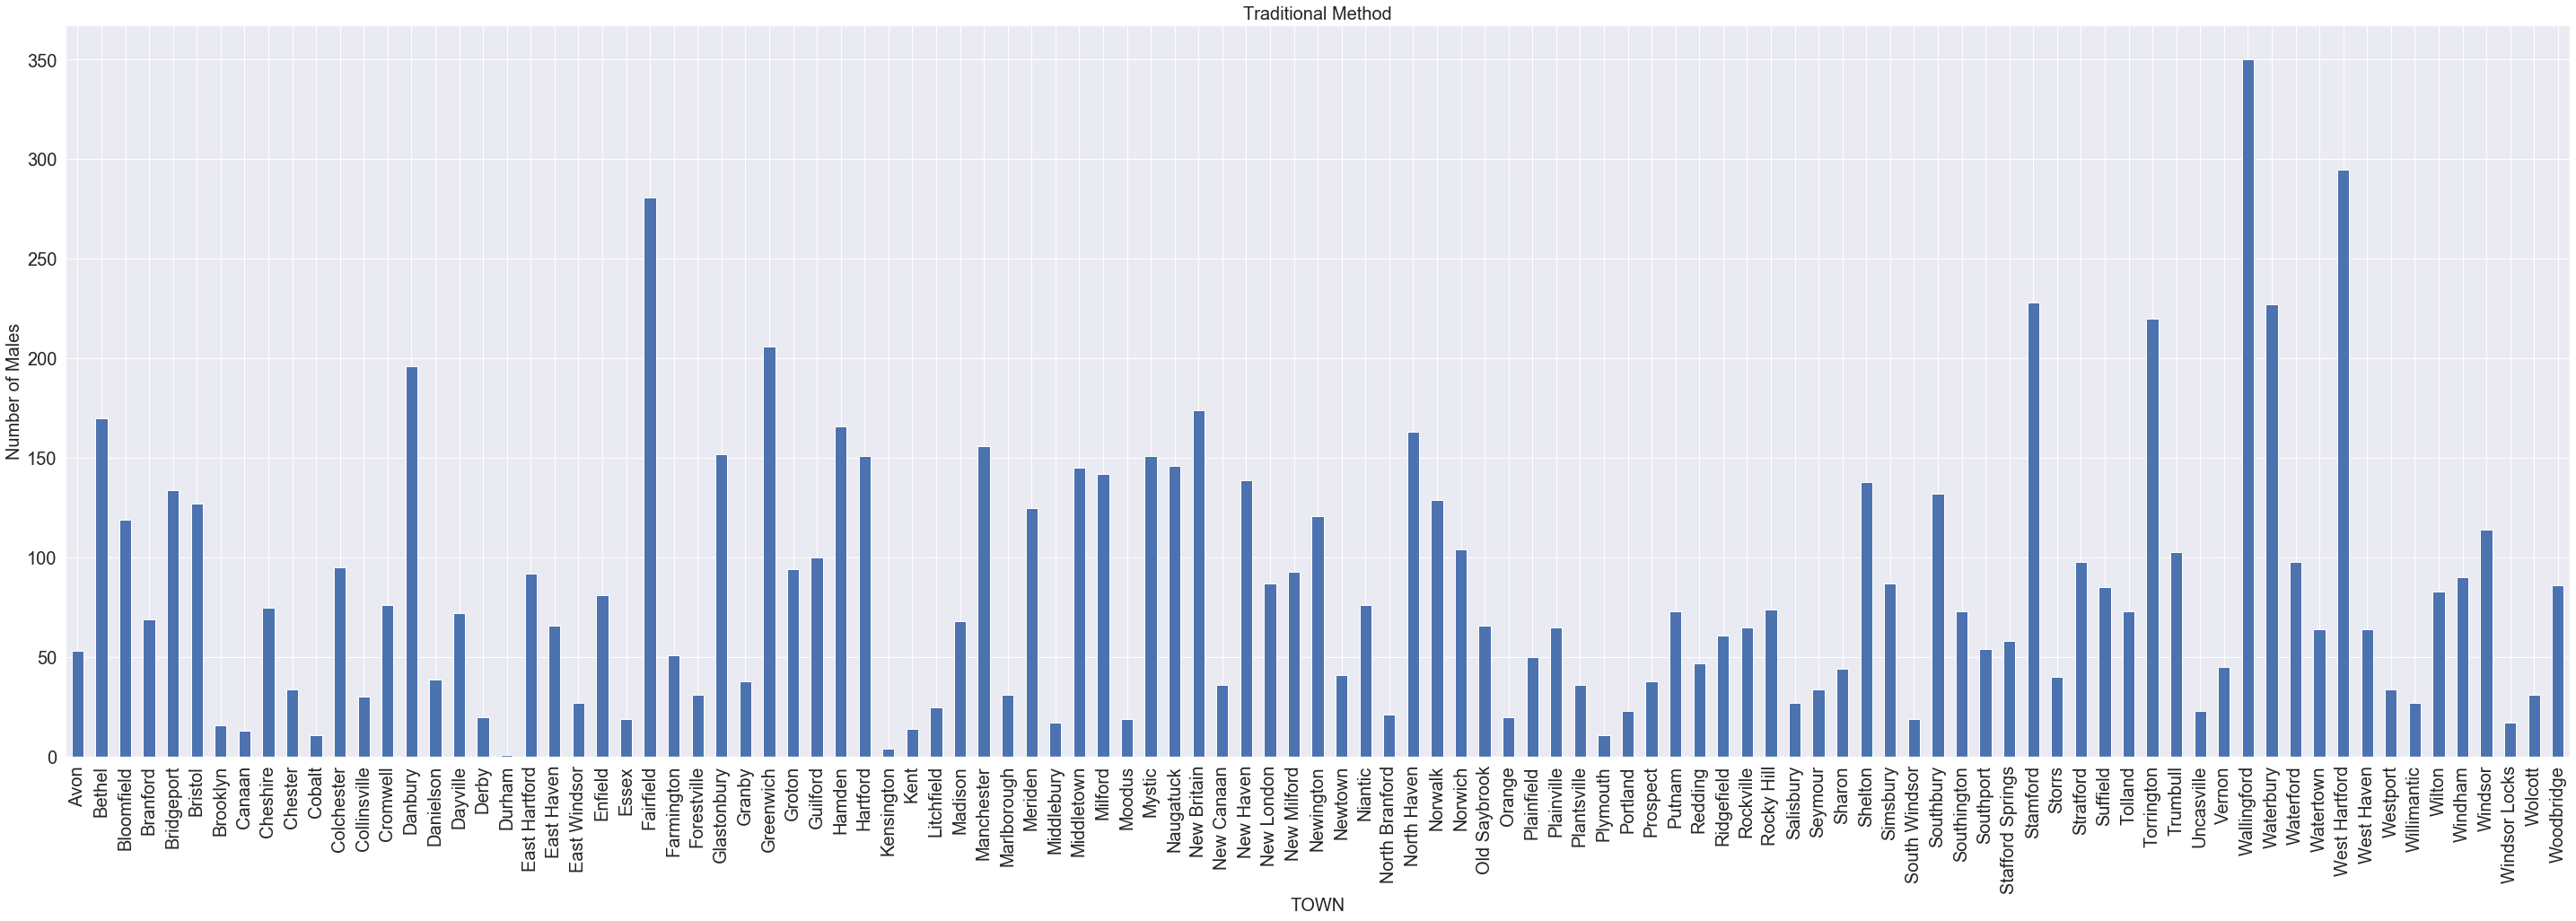

In [51]:
bigdata.groupby('TOWN')['Medicare fee-for-service (traditional)'].sum().plot(kind='bar',figsize=(50, 15), fontsize=20)
plt.xlabel('TOWN', fontsize=20)
plt.ylabel('Number of Males', fontsize=20)
plt.title('Traditional Method', fontsize=20)

Lets check how many people in town use the private pay

In [52]:
bigdata.groupby('TOWN')['Private pay (no insurance)'].sum()

TOWN
Avon                 87.0
Bethel               28.0
Bloomfield          112.0
Branford             46.0
Bridgeport           42.0
Bristol             119.0
Brooklyn             17.0
Canaan               64.0
Cheshire             25.0
Chester              48.0
Cobalt               24.0
Colchester           53.0
Collinsville         34.0
Cromwell             73.0
Danbury             108.0
Danielson            13.0
Dayville             76.0
Derby                22.0
Durham               13.0
East Hartford        40.0
East Haven           32.0
East Windsor         18.0
Enfield              69.0
Essex                27.0
Fairfield           362.0
Farmington           40.0
Forestville           8.0
Glastonbury          69.0
Granby               31.0
Greenwich           183.0
                    ...  
Shelton              89.0
Simsbury             59.0
South Windsor         7.0
Southbury           115.0
Southington          78.0
Southport            12.0
Stafford Springs     51.0
Stamfor

Text(0.5, 1.0, 'No insurance Method')

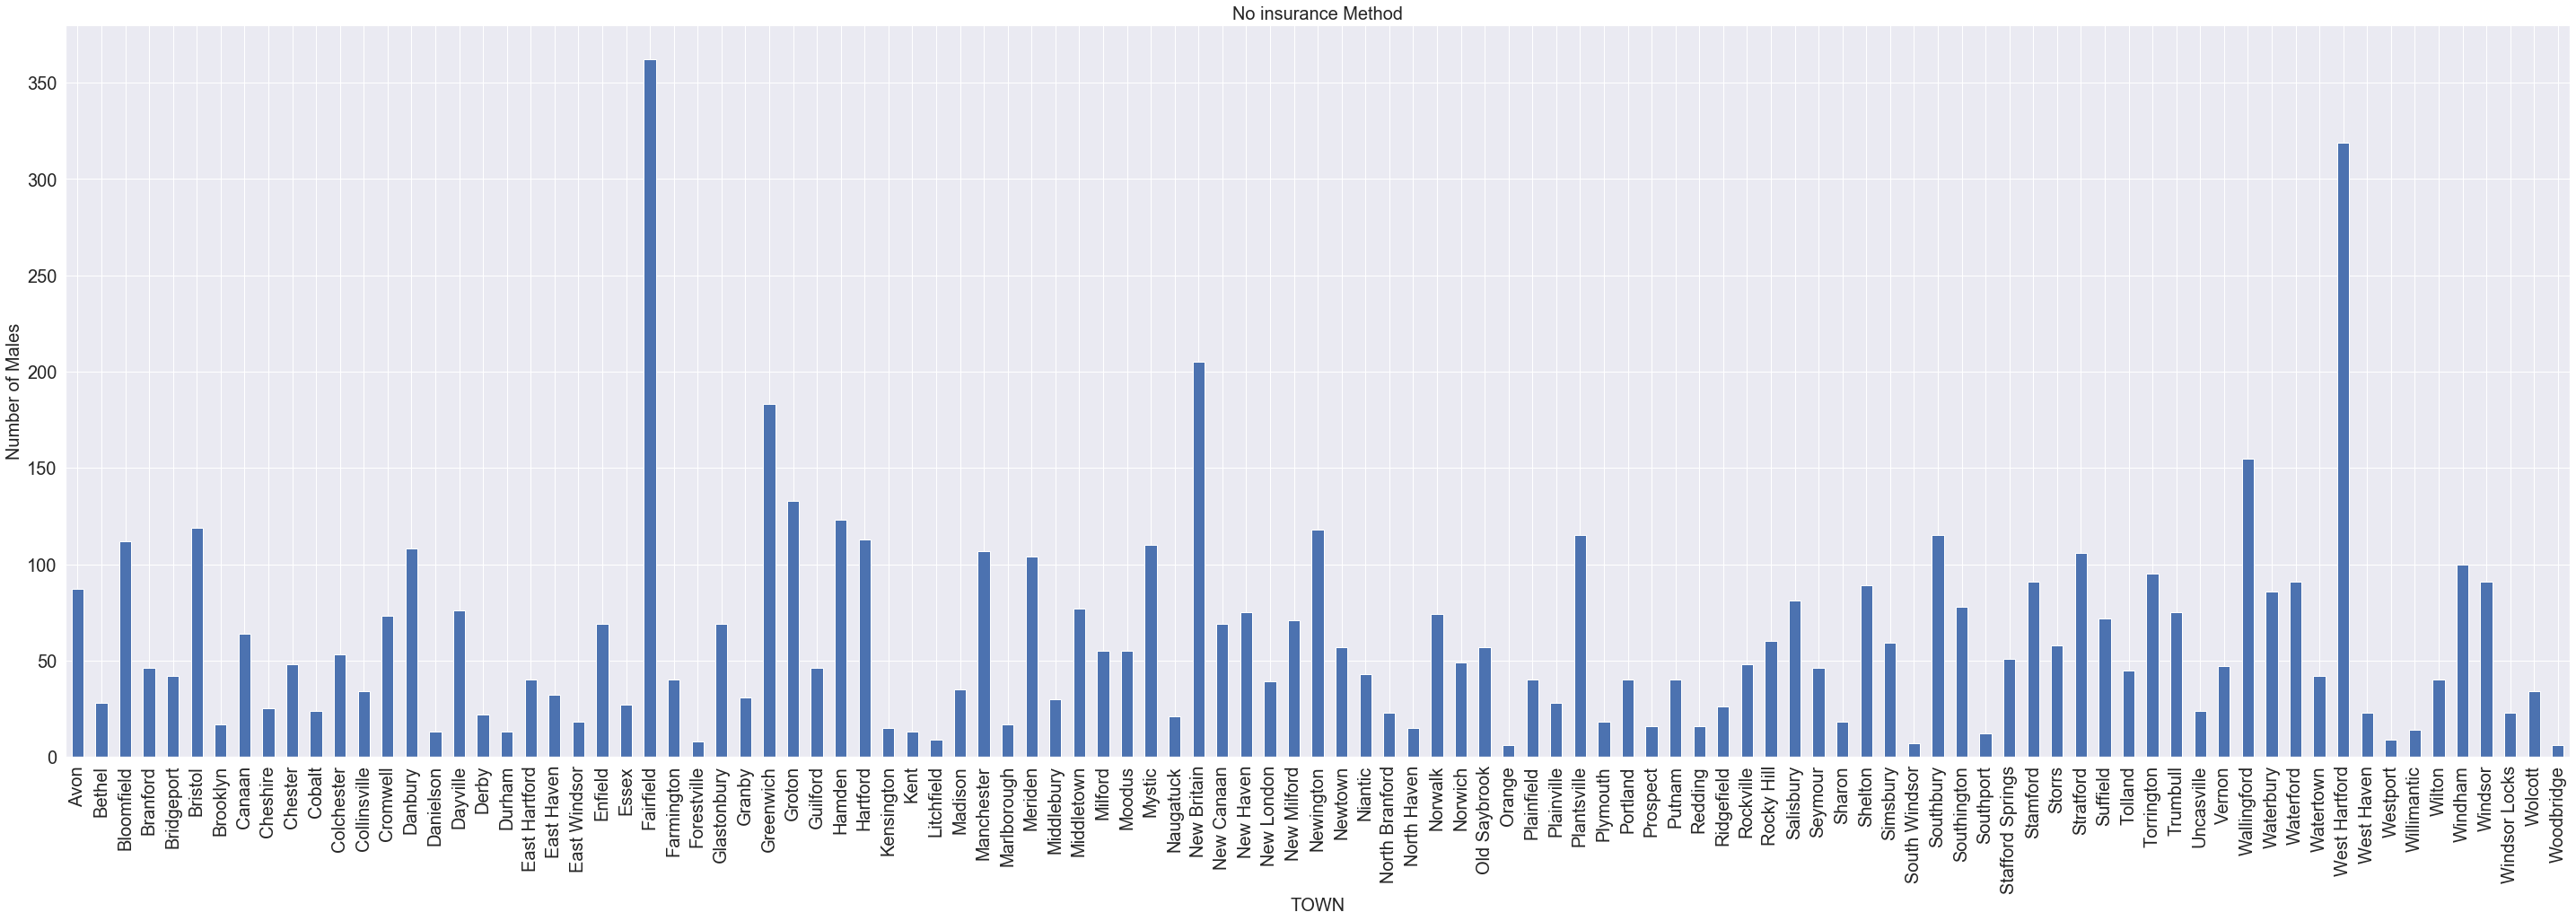

In [53]:
bigdata.groupby('TOWN')['Private pay (no insurance)'].sum().plot(kind='bar',figsize=(50, 15), fontsize=20)
plt.xlabel('TOWN', fontsize=20)
plt.ylabel('Number of Males', fontsize=20)
plt.title('No insurance Method', fontsize=20)

lets try and group by the percentages of private insurance 

In [72]:
bigdata.groupby('TOWN')['Percentage of private insurance '].sum()

TOWN
Avon                  38.908333
Bethel                72.756944
Bloomfield           410.108201
Branford              35.520833
Bridgeport           522.473810
Bristol              165.022258
Brooklyn              43.800000
Canaan                15.918506
Cheshire             238.708333
Chester               37.851215
Cobalt                19.613095
Colchester            60.541342
Collinsville          27.908333
Cromwell             228.716291
Danbury              329.566250
Danielson            154.600000
Dayville              11.989074
Derby                 96.716667
Durham                57.000000
East Hartford        310.601732
East Haven           188.723810
East Windsor         296.666667
Enfield              101.355012
Essex                 13.497222
Fairfield            124.980070
Farmington           105.400000
Forestville          146.916667
Glastonbury           57.427622
Granby                25.504274
Greenwich            111.145799
                       ...     
She

Text(0.5, 1.0, 'No insurance Method')

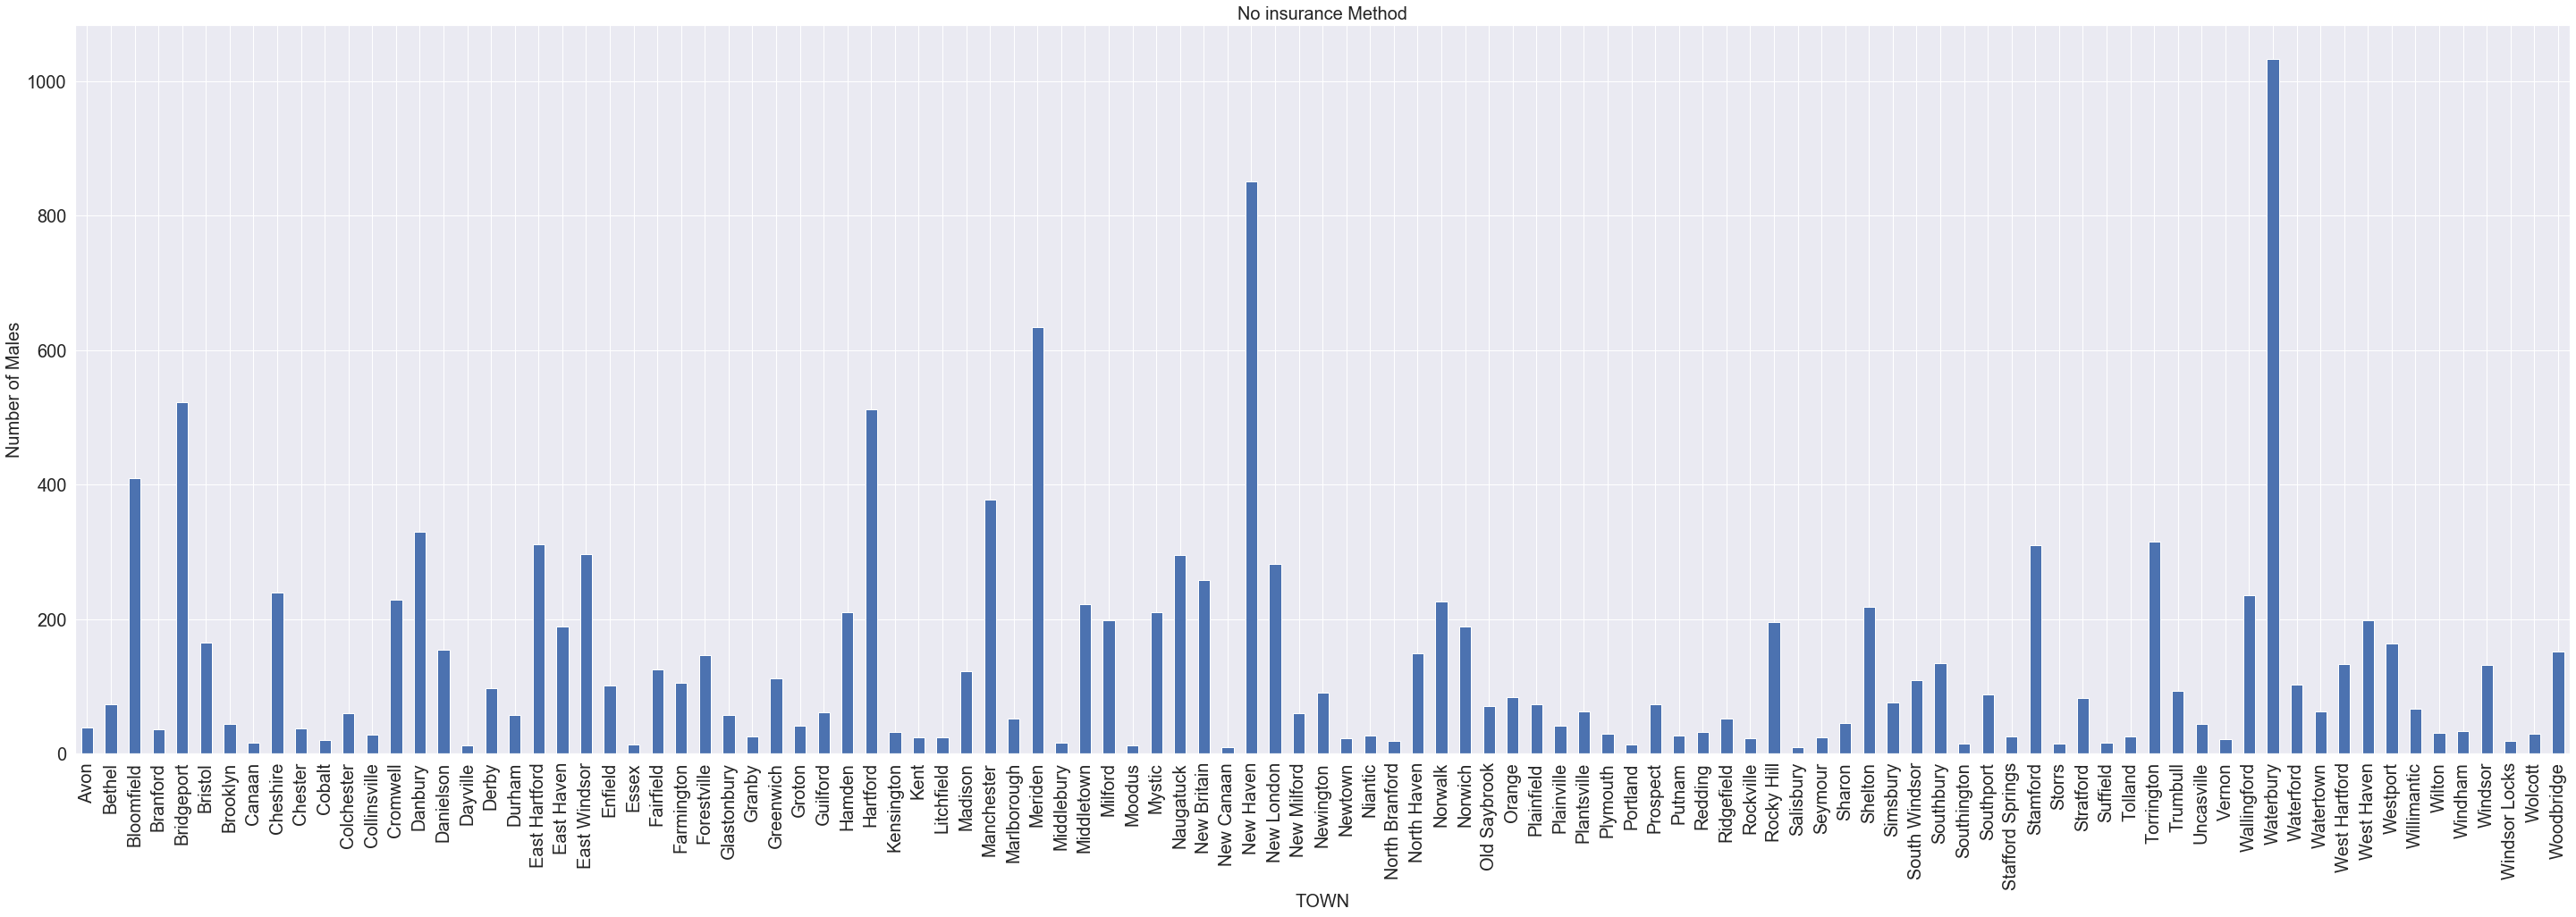

In [70]:
bigdata.groupby('TOWN')['Percentage of private insurance '].sum().plot(kind='bar',figsize=(50, 15), fontsize=20)
plt.xlabel('TOWN', fontsize=20)
plt.ylabel('Number of Males', fontsize=20)
plt.title('No insurance Method', fontsize=20)

lets try and group by the percentages of traditional insurance 

In [74]:
bigdata.groupby('TOWN')['Percentage of traditional insurance'].sum()

TOWN
Avon                 54.282143
Bethel                7.373361
Bloomfield          231.827597
Branford             24.305556
Bridgeport          327.366643
Bristol             162.129701
Brooklyn             57.150000
Canaan                8.538462
Cheshire             70.507895
Chester              72.714286
Cobalt               44.866667
Colchester           44.349996
Collinsville         30.865385
Cromwell             72.677778
Danbury             160.136023
Danielson            41.348901
Dayville             12.807971
Derby                49.952381
Durham               41.000000
East Hartford        98.075251
East Haven          120.619565
East Windsor        110.566667
Enfield              87.593061
Essex                21.305556
Fairfield           109.896125
Farmington           79.770202
Forestville          31.452381
Glastonbury          28.119803
Granby               20.979167
Greenwich            57.282835
                       ...    
Shelton             231.097191
Sim

Text(0.5, 1.0, 'Insurance Method')

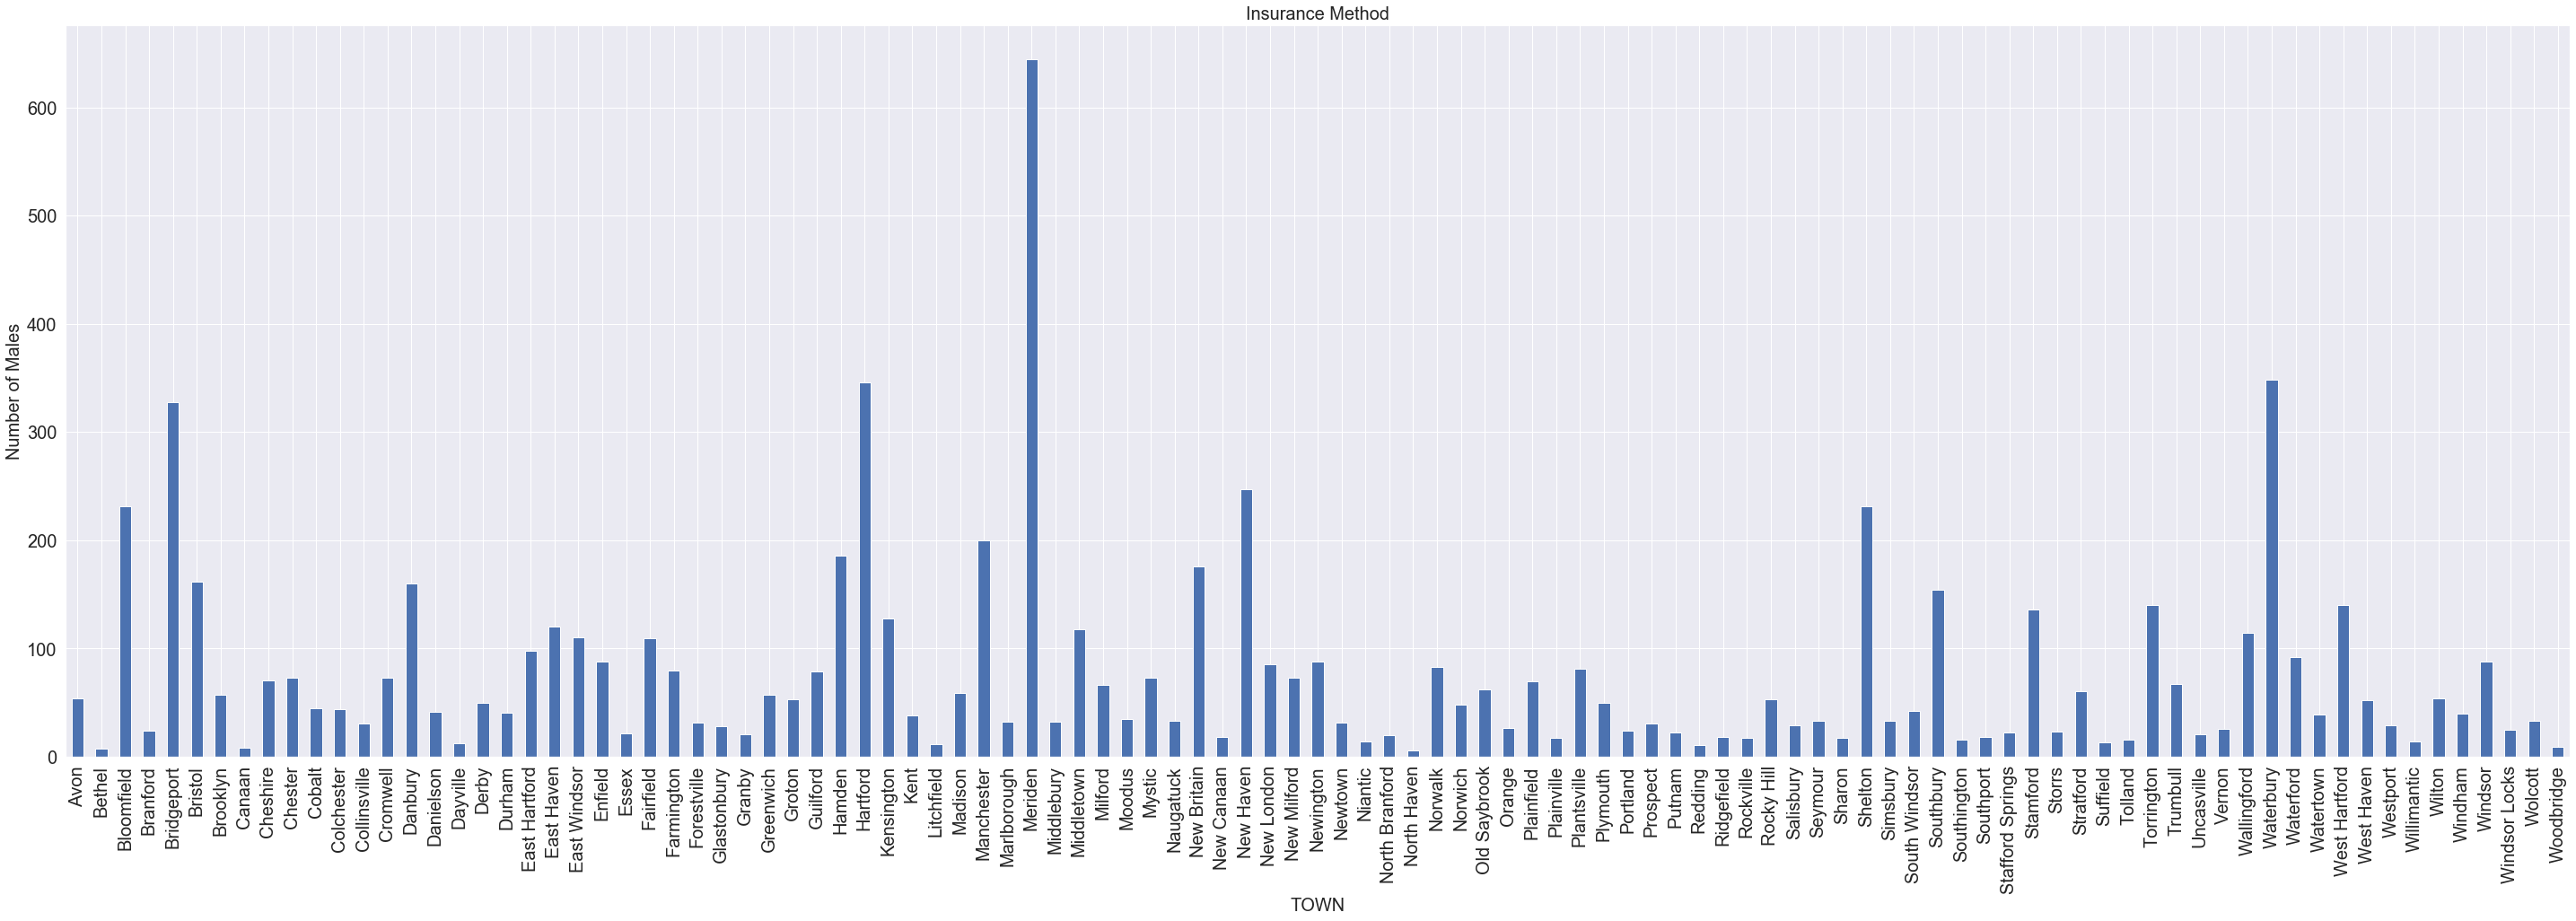

In [77]:
bigdata.groupby('TOWN')['Percentage of traditional insurance'].sum().plot(kind='bar',figsize=(50, 15), fontsize=20)
plt.xlabel('TOWN', fontsize=20)
plt.ylabel('Number of Males', fontsize=20)
plt.title('Insurance Method', fontsize=20)

calculating the total percantages in the entire column

In [80]:
Total = df1['Percentage of traditional insurance'].sum()
print (Total)

7968.652228612172


In [81]:
Total = df1['Percentage of private insurance '].sum()
print (Total)

14106.604482257


plotting the total 

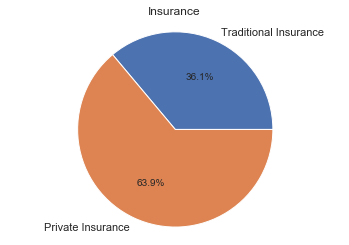

In [82]:
Total = [7968.6522,14106.6044]
my_labels = 'Traditional Insurance','Private Insurance'
plt.pie(Total,labels=my_labels,autopct='%1.1f%%')
plt.title('Insurance')
plt.axis('equal')
plt.show()

Distribution of ages, how many patients are less than the age of 35?
lets first calculate the total number of people in the entire column 

In [83]:
Total = df1['<18'].sum()
print (Total)

1


In [93]:
Total = df1['18 - 24'].sum()
print (Total)

41


In [94]:
Total = df1['25 - 34'].sum()
print (Total)

189


In [95]:
Total = df1['35 - 44'].sum()
print (Total)

554


In [96]:
Total = df1['45 - 54'].sum()
print (Total)

2359


In [97]:
Total = df1['55 - 64'].sum()
print (Total)

6521


In [98]:
Total = df1['65 - 74'].sum()
print (Total)

10305


In [99]:
Total = df1['75 - 84'].sum()
print (Total)

18133


In [101]:
Total = df1['85 - 94'].sum()
print (Total)

27331


In [102]:
Total = df1['95 and older'].sum()
print (Total)

7525


Lets plot the numbers by dividing them into two factors: Below 35 and 35 and above 

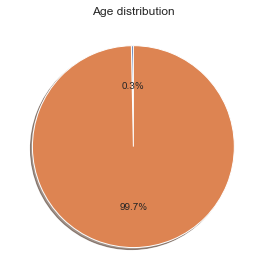

In [124]:
Age= [231,72728]
my_labels = 'less than 35','35 and older'
plt.pie(Age, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Age distribution')
plt.tight_layout()
plt.show()

There are more number of nursing facilities in the city that has more population than the rest that are not so populated. Lets start with grouping the county and the number of facilities in that particular county

In [139]:
bigdata.groupby('Name of the county ')['Number of facilities in each county '].sum()

Name of the county 
Fairfield     125.0
HartFord      194.0
Litchfield     44.0
Middlesex      47.0
New Haven     181.0
New London     53.0
Tolland        14.0
Windham        29.0
Name: Number of facilities in each county , dtype: float64

Text(0.5, 1.0, 'Number of facilities in each county')

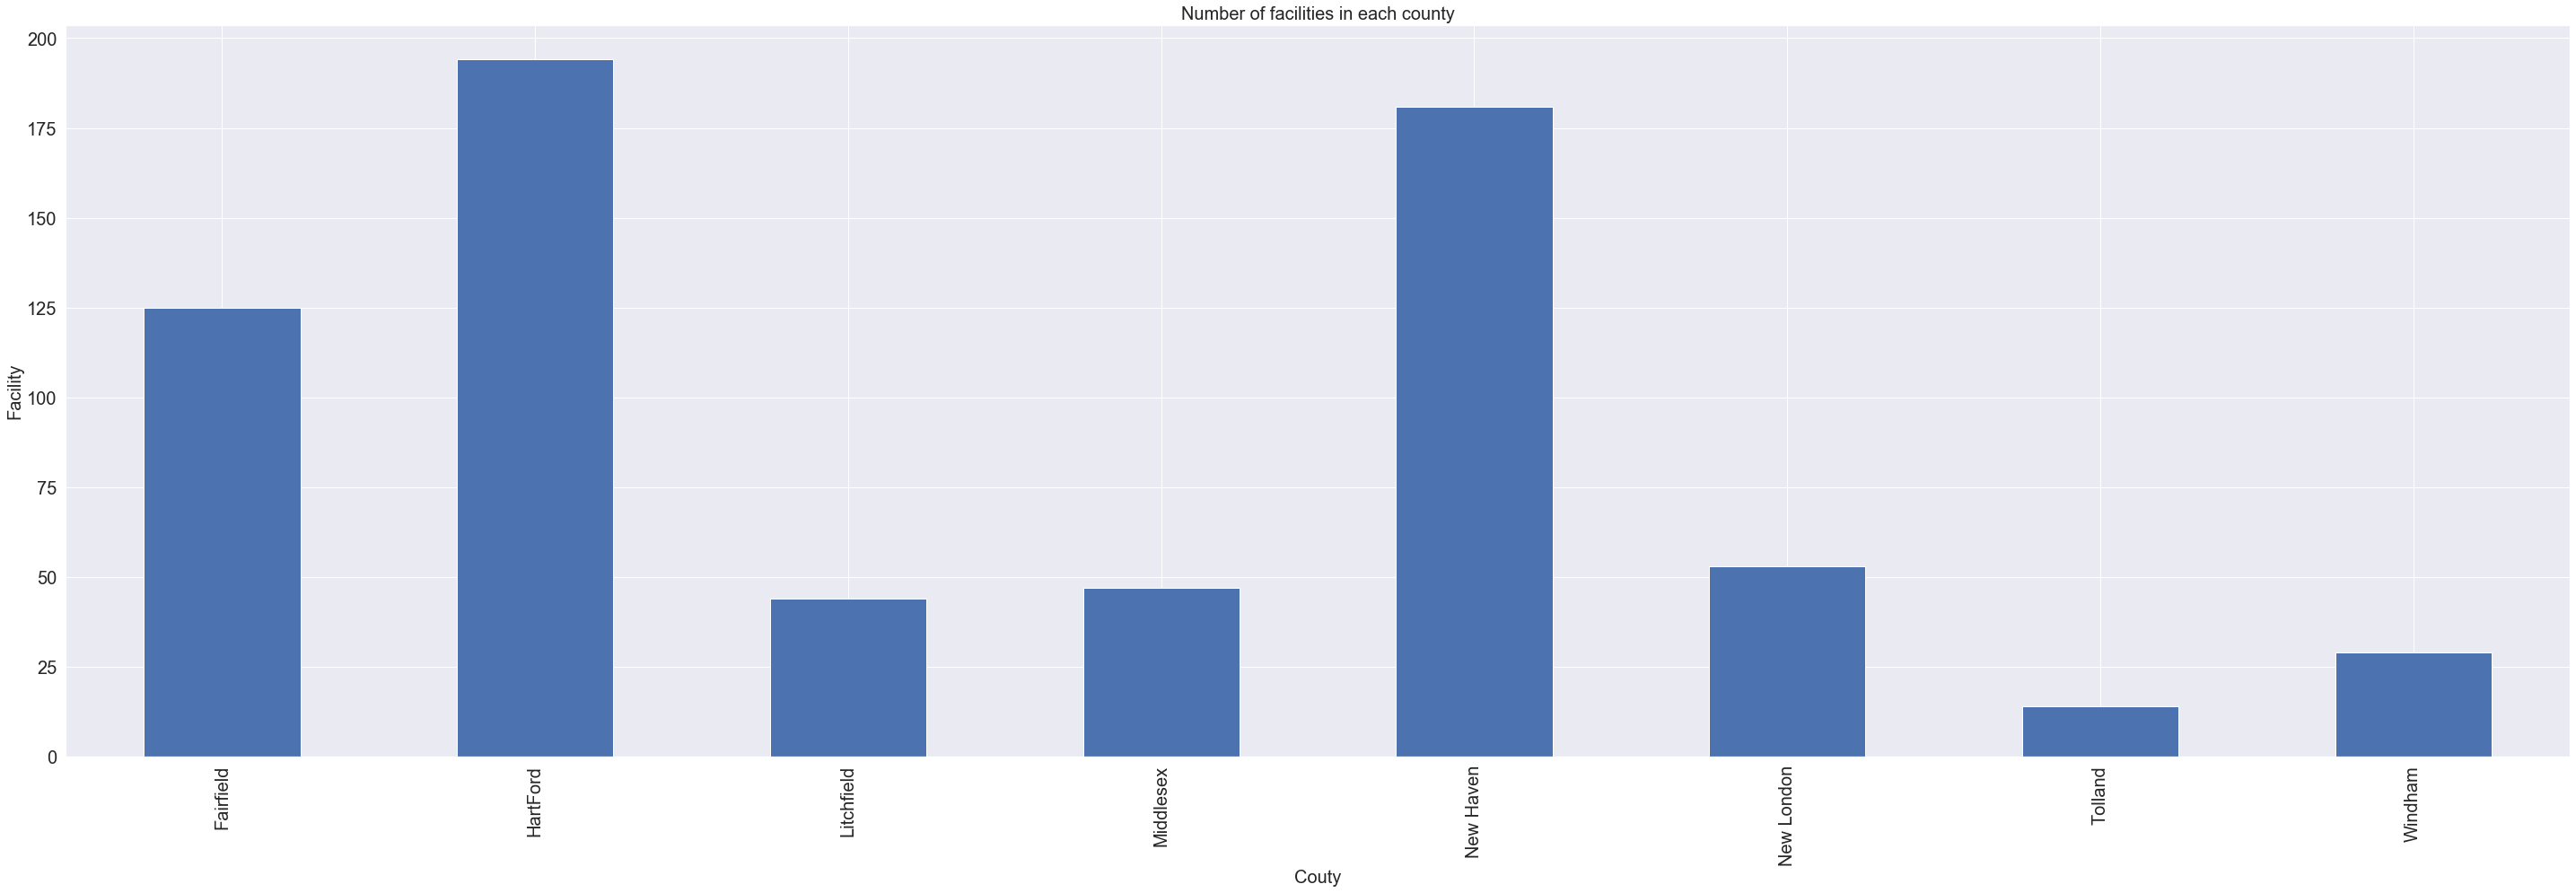

In [140]:
bigdata.groupby('Name of the county ')['Number of facilities in each county '].sum().plot(kind='bar',figsize=(50, 15), fontsize=20)
plt.xlabel('Couty', fontsize=20)
plt.ylabel('Facility', fontsize=20)
plt.title('Number of facilities in each county', fontsize=20)

let's combine the city and population to draw the analysis 

In [143]:
bigdata.groupby('City')['Population'].sum()

City
Andover            3231.0
Ansonia           18721.0
Ashford            4261.0
Avon              18302.0
Bantam              727.0
Barkhamsted        3624.0
Beacon Falls       6182.0
Berlin            20432.0
Bethany            5479.0
Bethel            19714.0
Bethlehem          3422.0
Bloomfield        21301.0
Bolton             4890.0
Bozrah             2537.0
Branford          28005.0
Bridgeport       144900.0
Bridgewater        1641.0
Bristol           60032.0
Brookfield        17002.0
Brooklyn           8280.0
Burlington         9665.0
Canaan             1055.0
Canterbury         5100.0
Canton            10270.0
Chaplin            2256.0
Cheshire          29179.0
Chester            4229.0
Clinton           12950.0
Colchester        15936.0
Colebrook          1405.0
                   ...   
Suffield          15743.0
Thomaston          7560.0
Tolland           14655.0
Torrington        34228.0
Trumbull          35802.0
Union               840.0
Vernon            29303.0
Volunto

In [172]:
bigdata.groupby('County ')['Population of the county'].sum()

County 
Fairfield      61952.0
Hartford      122587.0
Litchfield      8127.0
Middlesex     162855.0
New Haven     130418.0
New London     26939.0
Tolland        14655.0
Windham        24706.0
Name: Population of the county, dtype: float64

Text(0.5, 1.0, 'Population')

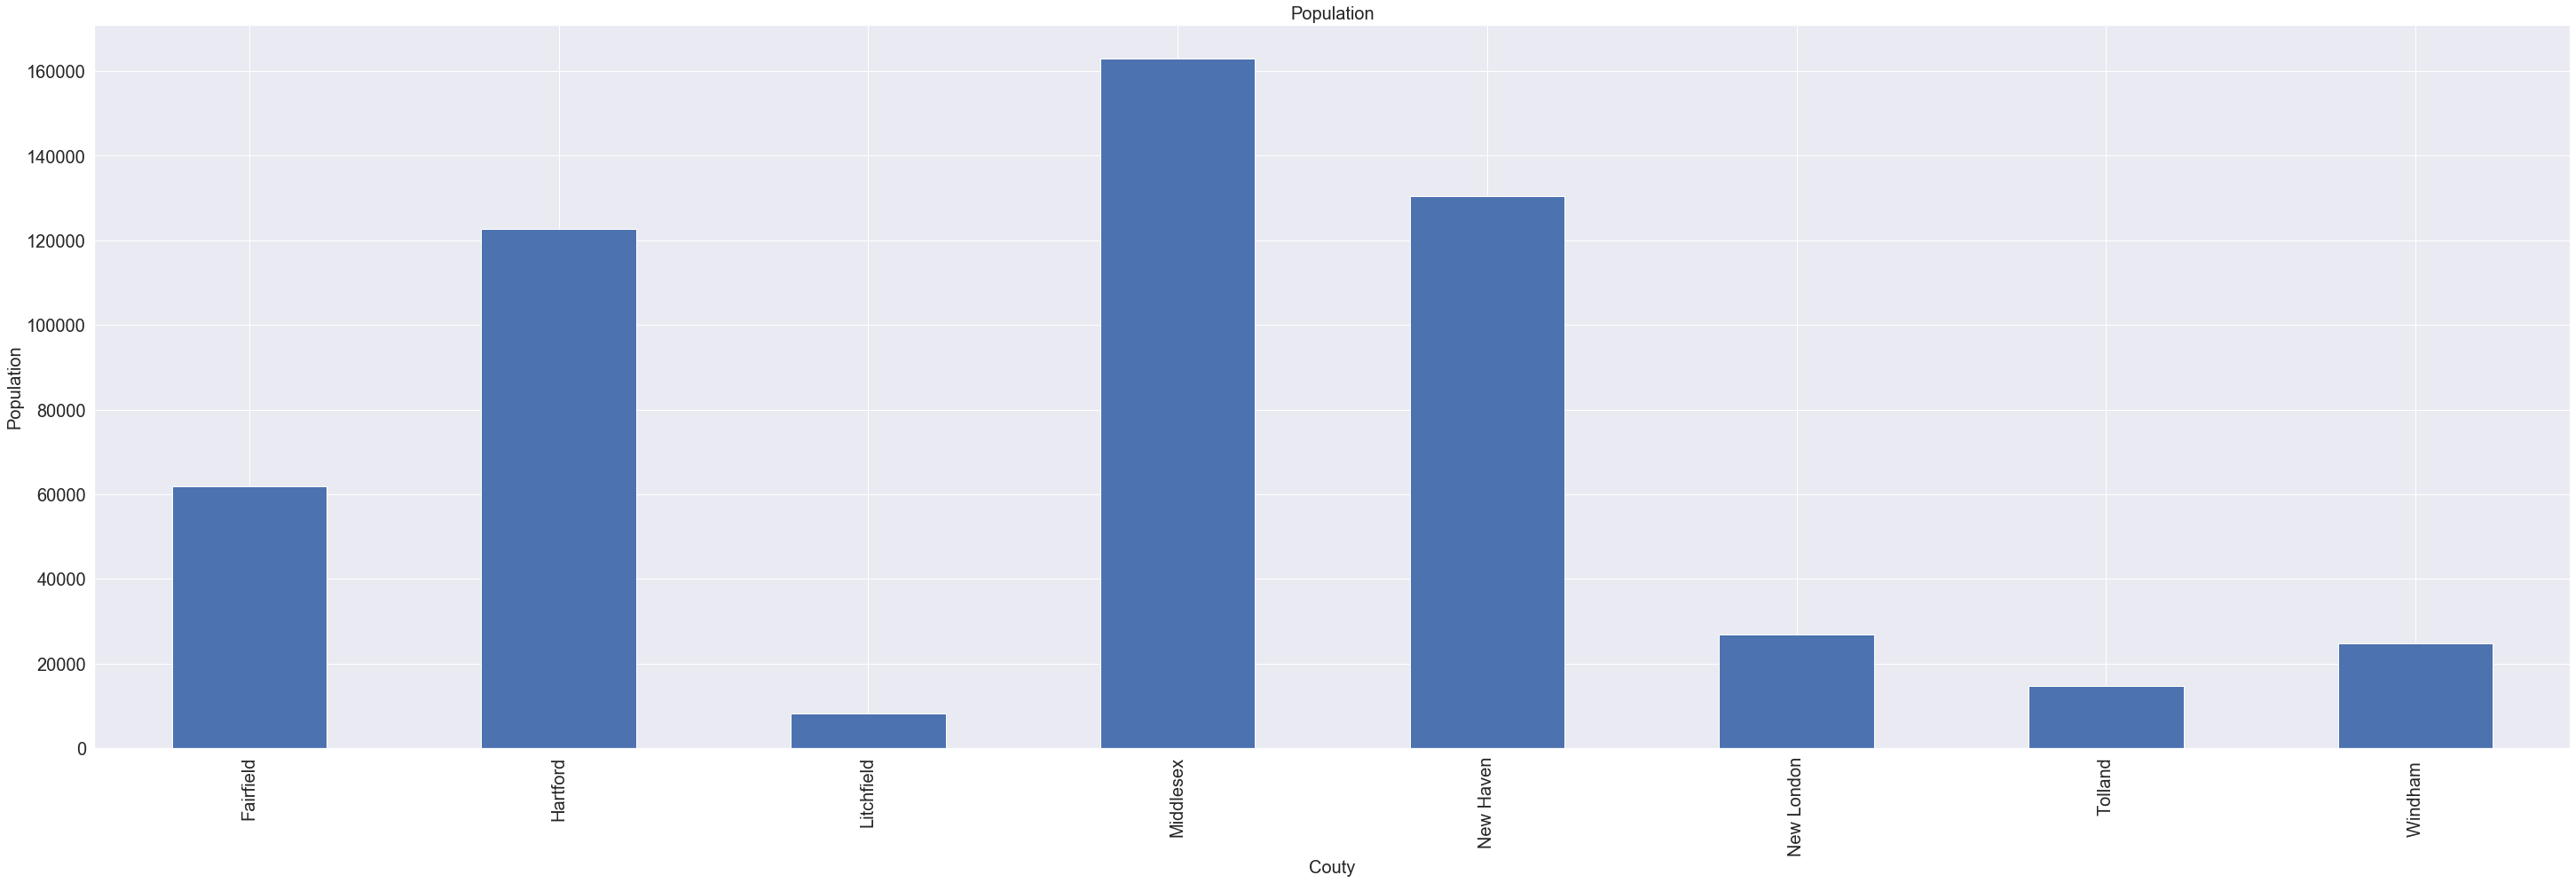

In [173]:
bigdata.groupby('County ')['Population of the county'].sum().plot(kind='bar',figsize=(50, 15), fontsize=20)
plt.xlabel('Couty', fontsize=20)
plt.ylabel('Population', fontsize=20)
plt.title('Population', fontsize=20)

Conclusion:  36% people don't use any sought of insurance which should be a factor to worry about as it is a huge number when compared to the traditional method and there must be some measures taken inorder to help those people. 
I am glad to know that in comparison to the total patients admitted there is very less amount of patients that are less patients less than 35 years.
My assumption was that the place that has maximum number of population should have the maximum number of facities but I was proven wrong as hartford has the most number of facilities but middlesex has the most number of population
